In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [62]:
car = pd.read_csv('car_data.csv')

In [63]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
car.shape

(301, 9)

In [65]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [67]:
print(car['Fuel_Type'].value_counts())
print(car['Transmission'].value_counts())
print(car['Owner'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [91]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [69]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [70]:
X = car.drop(['Car_Name', 'Selling_Price'],axis=1)
y= car['Selling_Price']

In [71]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [72]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

In [74]:
lin_reg_model = LinearRegression()

In [75]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [76]:
training_data_pred = lin_reg_model.predict(X_train)

In [77]:
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493703


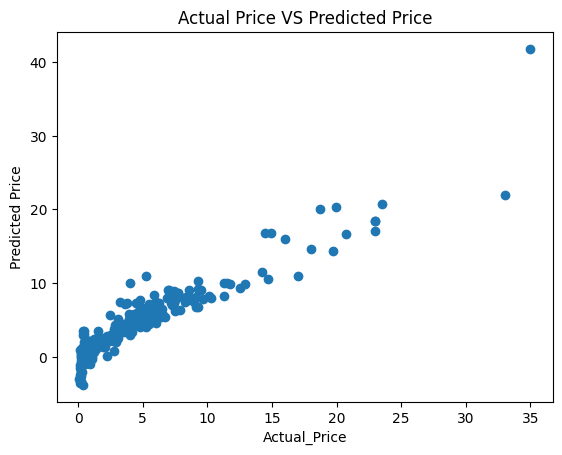

In [78]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [79]:
test_data_pred = lin_reg_model.predict(X_test)

In [80]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715024694


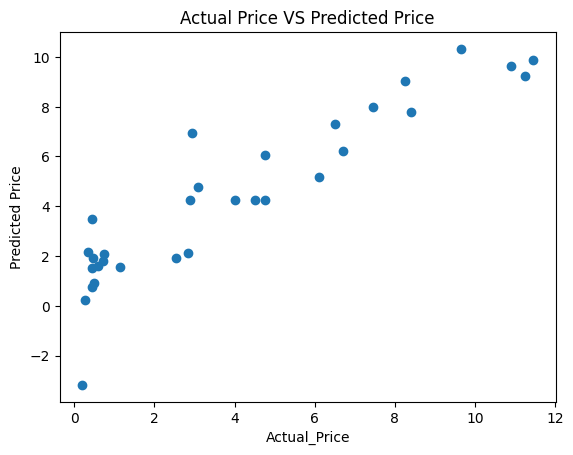

In [81]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [82]:
lass_reg_model = Lasso()

In [83]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [84]:
training_data_pred = lass_reg_model.predict(X_train)

In [85]:
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435795


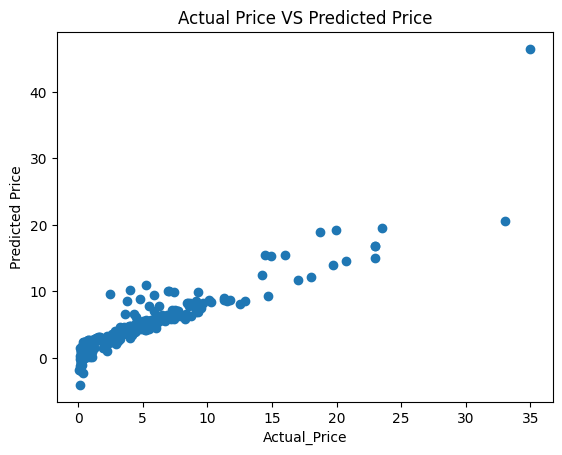

In [86]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [87]:
test_data_pred = lass_reg_model.predict(X_test)

In [88]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


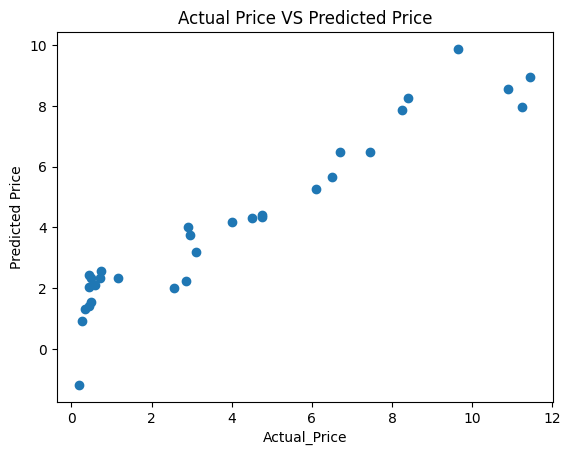

In [89]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()